In [1]:
%pip install openslide-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import json
from openslide import OpenSlide
import numpy as np

In [36]:
import torch

In [37]:
root_path=r'D:\Academics\Sem_2\EE_691_RnD_Project\Git\96171d81-6aab-4a58-bdf4-2de8fa3e48f3'
geojson_path=r'D:\Academics\Sem_2\EE_691_RnD_Project\Git\96171d81-6aab-4a58-bdf4-2de8fa3e48f3\TCGA-44-2665-11A-01-TS1.e284642f-9ea2-473f-b1ef-40c35957c436.geojson'
wsi_path=geojson_path.replace('.geojson','.svs')
print(wsi_path)
data = json.load(open(geojson_path))
num_annot=len(data['features']) 
print(f'no of annotations are {num_annot}')
wsi = OpenSlide(wsi_path)
w, h = wsi.dimensions
w, h = w//256, h//256
mask_t = np.zeros((h, w))
mask_nt = np.zeros((h, w))

D:\Academics\Sem_2\EE_691_RnD_Project\Git\96171d81-6aab-4a58-bdf4-2de8fa3e48f3\TCGA-44-2665-11A-01-TS1.e284642f-9ea2-473f-b1ef-40c35957c436.svs
no of annotations are 10


In [38]:
data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '7ab9a780-ec11-452c-aba6-2320e8cd2c56',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[2376, 1760],
      [2376, 1762],
      [2375, 1763],
      [2359, 1763],
      [2359, 1767],
      [2358, 1767],
      [2358, 1776],
      [2359, 1777],
      [2359, 1779],
      [2358, 1780],
      [2358, 1782],
      [2357, 1783],
      [2357, 1785],
      [2355, 1787],
      [2353, 1787],
      [2352, 1788],
      [2350, 1788],
      [2349, 1787],
      [2348, 1787],
      [2346, 1785],
      [2346, 1779],
      [2345, 1779],
      [2345, 1778],
      [2346, 1777],
      [2346, 1773],
      [2341, 1773],
      [2340, 1772],
      [2329, 1772],
      [2328, 1771],
      [2324, 1771],
      [2323, 1772],
      [2321, 1772],
      [2319, 1773],
      [2319, 1777],
      [2318, 1778],
      [2318, 1784],
      [2319, 1785],
      [2319, 1788],
      [2321, 1789],
      [2321, 1791],
      [2323, 1793],
      [2326, 1793

In [39]:
data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '7ab9a780-ec11-452c-aba6-2320e8cd2c56',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[2376, 1760],
      [2376, 1762],
      [2375, 1763],
      [2359, 1763],
      [2359, 1767],
      [2358, 1767],
      [2358, 1776],
      [2359, 1777],
      [2359, 1779],
      [2358, 1780],
      [2358, 1782],
      [2357, 1783],
      [2357, 1785],
      [2355, 1787],
      [2353, 1787],
      [2352, 1788],
      [2350, 1788],
      [2349, 1787],
      [2348, 1787],
      [2346, 1785],
      [2346, 1779],
      [2345, 1779],
      [2345, 1778],
      [2346, 1777],
      [2346, 1773],
      [2341, 1773],
      [2340, 1772],
      [2329, 1772],
      [2328, 1771],
      [2324, 1771],
      [2323, 1772],
      [2321, 1772],
      [2319, 1773],
      [2319, 1777],
      [2318, 1778],
      [2318, 1784],
      [2319, 1785],
      [2319, 1788],
      [2321, 1789],
      [2321, 1791],
      [2323, 1793],
      [2326, 1793

In [40]:
wsi

OpenSlide('D:\\Academics\\Sem_2\\EE_691_RnD_Project\\Git\\96171d81-6aab-4a58-bdf4-2de8fa3e48f3\\TCGA-44-2665-11A-01-TS1.e284642f-9ea2-473f-b1ef-40c35957c436.svs')

In [41]:
import json

# classification object for the first feature
print(json.dumps(data['features'][0]['properties']['classification'], indent=2))


{
  "name": "Immune cells",
  "color": [
    160,
    90,
    160
  ]
}


In [42]:
for d in data['features']:
    props = d.get('properties', {})
    if 'classification' in props and 'name' in props['classification']:
        cl = props['classification']['name']
    else:
        cl = 'Unknown'  # or skip with `continue` if desired

    type = d['geometry']['type']
    print(f'class is {cl} and type is {type}')


class is Immune cells and type is Polygon
class is Immune cells and type is Polygon
class is Immune cells and type is Polygon
class is Immune cells and type is Polygon
class is Immune cells and type is Polygon
class is Immune cells and type is Polygon
class is Tumor and type is Polygon
class is Tumor and type is Polygon
class is Tumor and type is Polygon
class is Tumor and type is Polygon


In [43]:
#### this piece of code will generates a mask if class is Tumor Epithelium
for item in data['features']:
    class_name = item['properties']['classification']['name']
    type_ = item['geometry']['type']
    if not class_name=='Tumor':continue
    if type_ == 'Polygon':
        cnt = item['geometry']['coordinates']
        for idx, c in enumerate(cnt):
            c = np.array(c)//256
            if idx == 0: mask_t = cv2.drawContours(mask_t, [c.astype(int)], -1, 1, -1)
            else: mask_t = cv2.drawContours(mask_t, [c.astype(int)], -1, 0, -1)
    if type_ == 'MultiPolygon':
        for cnt in item['geometry']['coordinates']:
            for idx, c in enumerate(cnt):
                c = np.array(c)//256
                if idx == 0: mask_t = cv2.drawContours(mask_t, [c.astype(int)], -1, 1, -1)
                else: mask_t = cv2.drawContours(mask_t, [c.astype(int)], -1, 0, -1)
    else:
        print(f'failed with {class_name} and {type}')
        pass

failed with Tumor and Polygon
failed with Tumor and Polygon
failed with Tumor and Polygon
failed with Tumor and Polygon


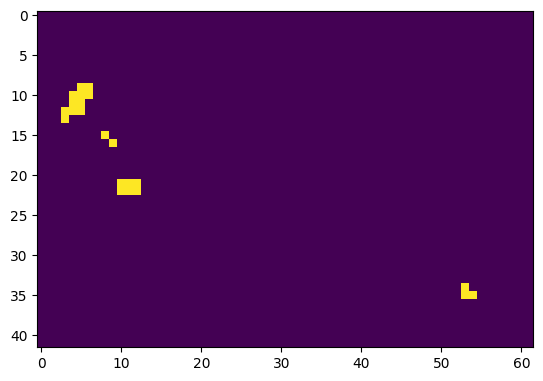

In [44]:
plt.imshow(mask_t)

In [45]:
Image.fromarray(mask_t.astype(np.uint8) * 255).save("slide1_t_mask.png")

In [46]:
dim1, dim2 = np.where(mask_t>0)
print(dim1.shape,dim2.shape)
dim1, dim2 = dim1*256, dim2*256
print(dim1[0:500],dim2[0:500])

(22,) (22,)
[2304 2304 2560 2560 2560 2816 2816 3072 3072 3072 3328 3840 4096 5376
 5376 5376 5632 5632 5632 8704 8960 8960] [ 1280  1536  1024  1280  1536  1024  1280   768  1024  1280   768  2048
  2304  2560  2816  3072  2560  2816  3072 13568 13568 13824]


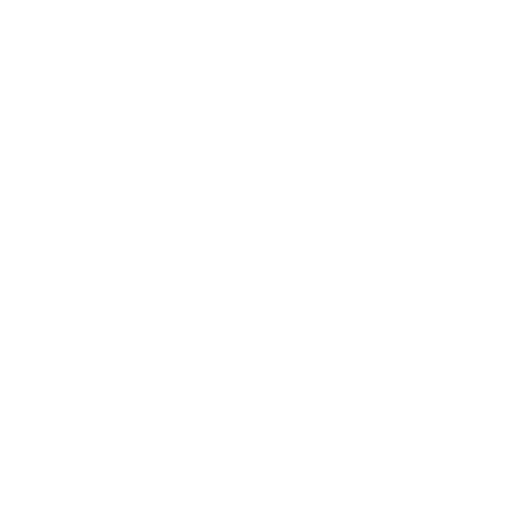

In [47]:
wsi.read_region((29440, 0), 0, (512, 512))

In [48]:
import pandas as pd

In [49]:
df_t=pd.DataFrame({'dim1': dim1, 'dim2':dim2})

In [50]:
df_t

,dim1,dim2
0,2304,1280
1,2304,1536
2,2560,1024
3,2560,1280
4,2560,1536
5,2816,1024
6,2816,1280
7,3072,768
8,3072,1024
9,3072,1280


In [51]:
wsi_name=wsi_path.split('/')[-1].split('-')
wsi_name=wsi_name[0]+'-'+wsi_name[1]+'-'+wsi_name[2]
# print(wsi_name)
df_t.to_csv(r'D:\Academics\Sem_2\EE_691_RnD_Project\Git\96171d81-6aab-4a58-bdf4-2de8fa3e48f3_tumor.csv', index=False)

In [17]:
###### for  non_tumor class

In [52]:
for item in data['features']:
    class_name = item['properties']['classification']['name']
    type_ = item['geometry']['type']
    if class_name=='Tumor':continue
    if type_ == 'Polygon':
        cnt = item['geometry']['coordinates']
        for idx, c in enumerate(cnt):
            c = np.array(c)//256
            if idx == 0: mask_nt = cv2.drawContours(mask_nt, [c.astype(int)], -1, 1, -1)
            else: mask_nt = cv2.drawContours(mask_nt, [c.astype(int)], -1, 0, -1)
    if type_ == 'MultiPolygon':
        for cnt in item['geometry']['coordinates']:
            for idx, c in enumerate(cnt):
                c = np.array(c)//256
                if idx == 0: mask_nt = cv2.drawContours(mask_nt, [c.astype(int)], -1, 1, -1)
                else: mask_nt = cv2.drawContours(mask_nt, [c.astype(int)], -1, 0, -1)
    else:
        print(f'fail with {class_name} and type is {type}')
        pass

fail with Immune cells and type is Polygon
fail with Immune cells and type is Polygon
fail with Immune cells and type is Polygon
fail with Immune cells and type is Polygon
fail with Immune cells and type is Polygon
fail with Immune cells and type is Polygon


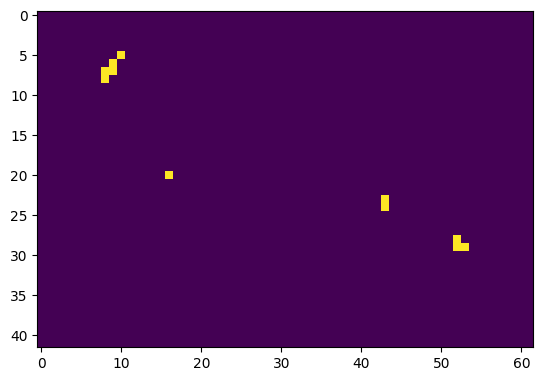

In [53]:
plt.imshow(mask_nt)

In [54]:
dim1, dim2 = np.where(mask_nt>0)
dim1, dim2 = dim1*256, dim2*256

In [58]:
Image.fromarray(mask_nt.astype(np.uint8) * 255).save("slide1_nt_mask.png")

In [21]:
df_nt=pd.DataFrame({'dim1': dim1, 'dim2':dim2})

In [23]:
wsi_name=wsi_path.split('/')[-1].split('-')
wsi_name=wsi_name[0]+'-'+wsi_name[1]+'-'+wsi_name[2]
# print(wsi_name)
df_nt.to_csv('D:\Academics\Sem_2\EE_691_RnD_Project\Git\96171d81-6aab-4a58-bdf4-2de8fa3e48f3_non_tumor.csv', index=False)

<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Admin\AppData\Local\Temp\ipykernel_9708\1456860906.py:4: SyntaxWarning: invalid escape sequence '\A'
  df_nt.to_csv('D:\Academics\Sem_2\EE_691_RnD_Project\Git\96171d81-6aab-4a58-bdf4-2de8fa3e48f3_non_tumor.csv', index=False)


In [1]:
pwd

'/home1/ravi/Desktop/hpv_project/tum_ntum'

In [18]:
#### if polygon have negative contr

In [25]:
for item in data['features']:
    try:
        # if polygon
        class_name = item['properties']['classification']['name']
        if not class_name == 'Tumor': continue
        pos_cnt = item['geometry']['coordinates'][0]   #first one is outer cnt
        neg_cnts = item['geometry']['coordinates'][1:]  ###1 and next are negative polygon
        cnt = np.array(cnt)//256
        mask = cv2.drawContours(mask_t, [pos_cnt.astype(int)], -1, 1, -1)
        for neg_cnt in neg_cnts:
            mask = cv2.drawContours(mask_t, [neg_cnt.astype(int)], -1, 0, -1)
    except:
        pass

In [27]:
data['features']

[{'type': 'Feature',
  'id': '7ab9a780-ec11-452c-aba6-2320e8cd2c56',
  'geometry': {'type': 'Polygon',
   'coordinates': [[[2376, 1760],
     [2376, 1762],
     [2375, 1763],
     [2359, 1763],
     [2359, 1767],
     [2358, 1767],
     [2358, 1776],
     [2359, 1777],
     [2359, 1779],
     [2358, 1780],
     [2358, 1782],
     [2357, 1783],
     [2357, 1785],
     [2355, 1787],
     [2353, 1787],
     [2352, 1788],
     [2350, 1788],
     [2349, 1787],
     [2348, 1787],
     [2346, 1785],
     [2346, 1779],
     [2345, 1779],
     [2345, 1778],
     [2346, 1777],
     [2346, 1773],
     [2341, 1773],
     [2340, 1772],
     [2329, 1772],
     [2328, 1771],
     [2324, 1771],
     [2323, 1772],
     [2321, 1772],
     [2319, 1773],
     [2319, 1777],
     [2318, 1778],
     [2318, 1784],
     [2319, 1785],
     [2319, 1788],
     [2321, 1789],
     [2321, 1791],
     [2323, 1793],
     [2326, 1793],
     [2327, 1794],
     [2327, 1795],
     [2328, 1795],
     [2331, 1797],
     [23

In [ ]:
pos